In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from workflow.plots.get_gc_content_and_contam import GetGcContentAndContam


In [2]:
DF = GetGcContentAndContam().output().read_cached()
DF.head()

,gid,contig,map_pct,length,gc
0,GCA_000196215.1,CP000013.1,0.000000,904246,28.304798
1,GCA_000196215.1,CP000014.1,96.000000,27108,25.601299
2,GCA_000196215.1,CP000015.1,97.560976,55560,26.465083
3,GCA_000143435.1,CP002034.1,95.134228,1828169,32.897724
4,GCA_000143435.1,CP002037.1,89.430894,242962,31.996773


In [3]:
def get_per_gid_contig_vals():
    out = defaultdict(list)
    for row in DF.itertuples():
        out[row.gid].append(row.gc)

    avg, median = dict(), dict()
    for gid, gc_vals in out.items():
        avg[gid] = float(np.mean(gc_vals))
        median[gid] = float(np.median(gc_vals))
    return avg, median

D_GID_TO_CONTIG_GC_AVG, D_GID_TO_CONTIG_GC_MEDIAN = get_per_gid_contig_vals()

In [6]:
def gen_data_gc_avg():
    rows = list()



    for row in DF.itertuples():

        if not row.gid in gid_subset:
            continue


        rows.append({
            'avg_gc': D_GID_TO_CONTIG_GC_AVG[row.gid],
            'median_gc': D_GID_TO_CONTIG_GC_MEDIAN[row.gid],
            'gc': row.gc,
            'pct': row.map_pct
        })

    df = pd.DataFrame(rows)
    return df


DF_AVG = gen_data_gc_avg()
DF_AVG.head()

,avg_gc,median_gc,gc,pct
0,42.07998,45.7891,35.339880,20.000000
1,42.07998,45.7891,38.345018,60.000000
2,42.07998,45.7891,46.938776,60.000000
3,42.07998,45.7891,46.505262,90.476190
4,42.07998,45.7891,48.091963,85.714286


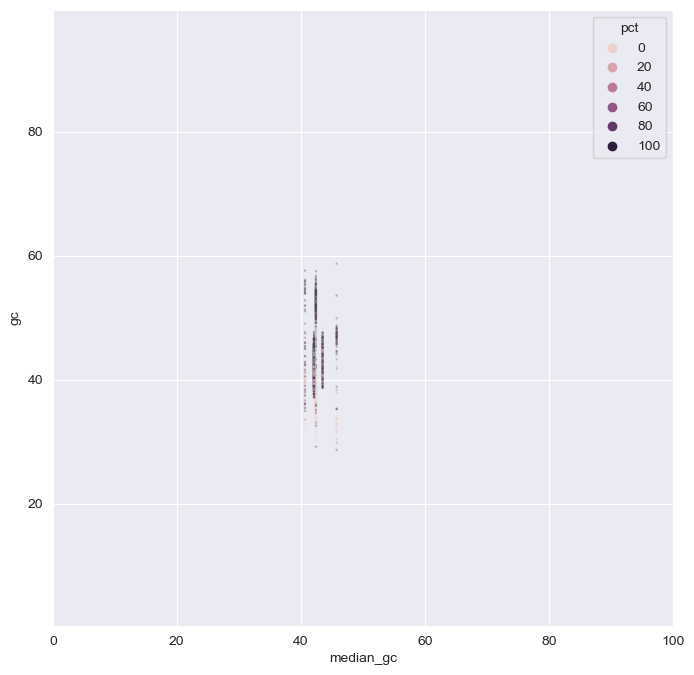

In [10]:
def make_plot_gc_avg():
    fig, ax = plt.subplots(figsize=(8,8))
    plt.rcParams['svg.fonttype'] = 'none'

    ax.axis('equal')
    ax.set(xlim=(0, 100))
    ax.set(ylim=(0, 100))

    sns.scatterplot(data=DF_AVG, x='avg_gc', y='gc', hue='pct', ax=ax, s=3, alpha=0.3)

    plt.show()
    return


make_plot_gc_avg()



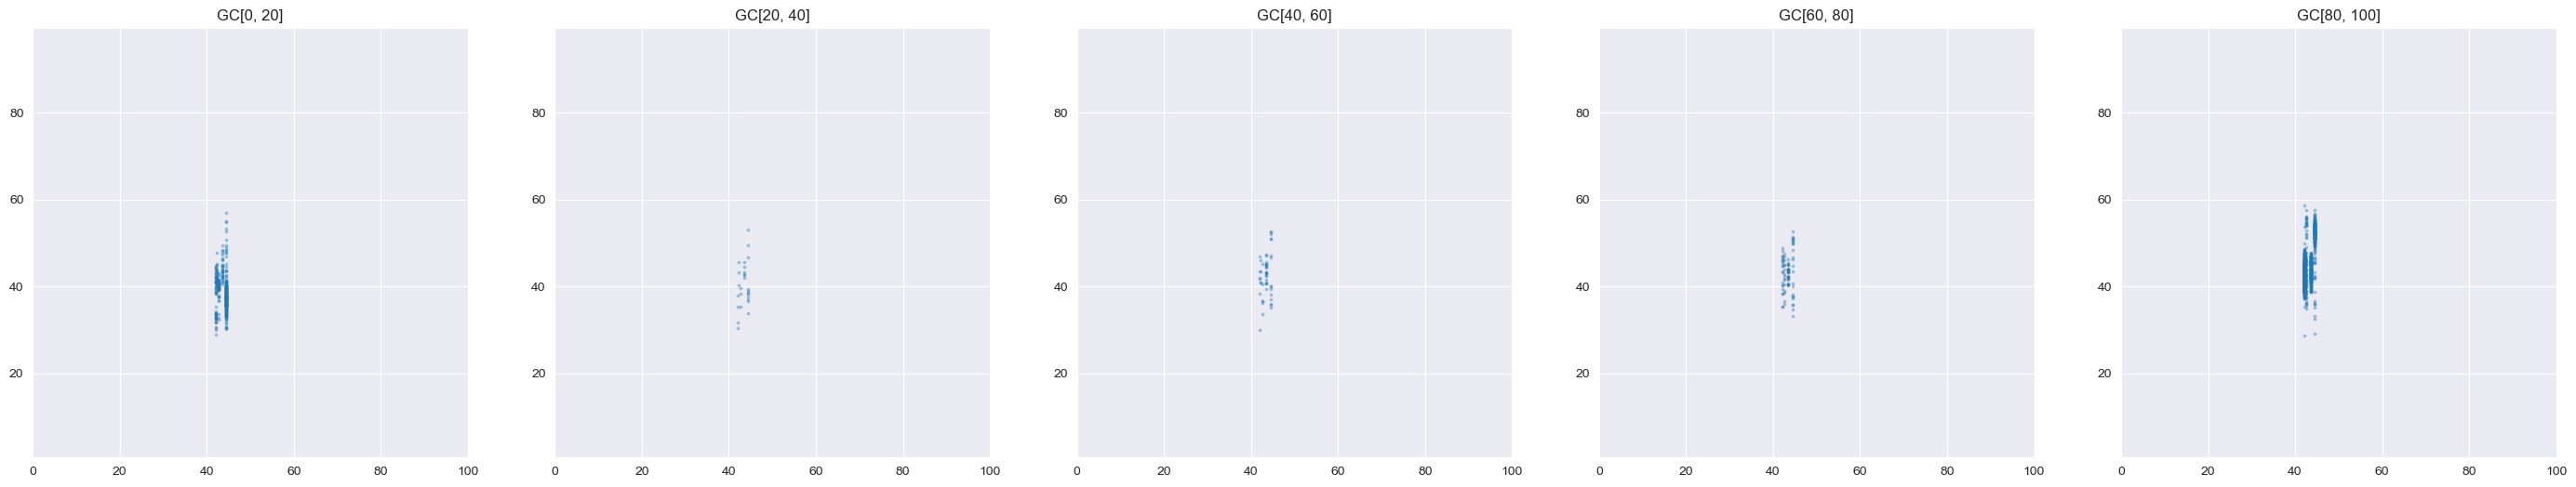

In [8]:
def make_plot_gc_avg():
    ranges = [(0, 20), (20, 40), (40, 60), (60, 80), (80, 100)]
    fig, axes = plt.subplots(1, len(ranges), figsize=(35,6))
    plt.rcParams['svg.fonttype'] = 'none'

    lim_l = 0
    lim_h = 100

    for (range_low, range_high), ax in zip(ranges, axes):

        ax.axis('equal')
        ax.set_xlim(lim_l, lim_h)
        ax.set_ylim(lim_l, lim_h)

        ax.title.set_text(f'GC[{range_low}, {range_high}]')

        df = DF_AVG[(DF_AVG['pct'] >= range_low) & (DF_AVG['pct'] <= range_high)]
        ax.scatter(x=df['avg_gc'], y=df['gc'], s=3, alpha=0.3)
        # ax.scatter(x=df['median_gc'], y=df['gc'], c=df['pct'], s=3, alpha=0.3, cmap="viridis")
    plt.show()
    return


make_plot_gc_avg()



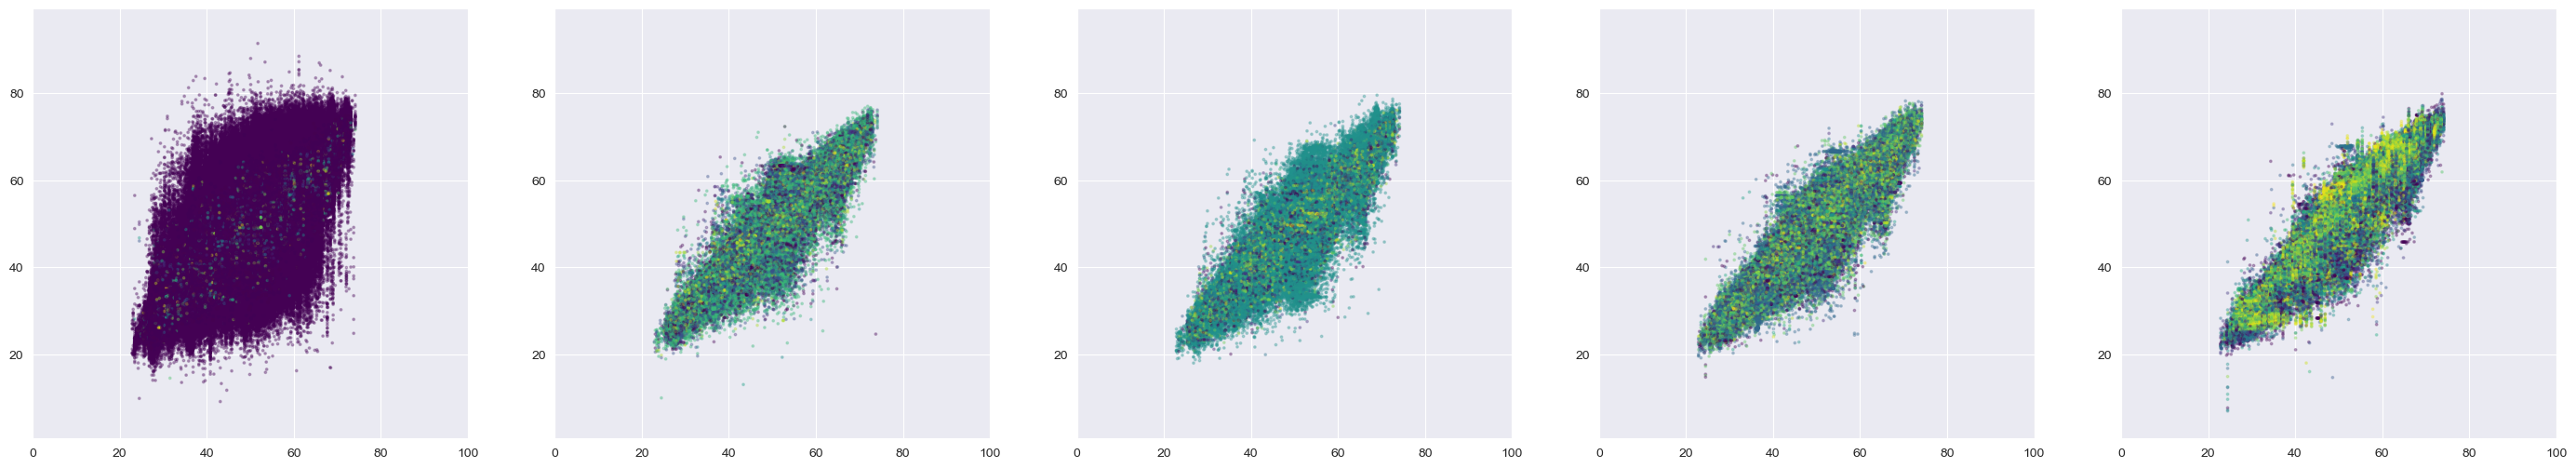

In [42]:
def make_plot_gc_avg():
    ranges = [(0, 20), (20, 40), (40, 60), (60, 80), (80, 100)]
    fig, axes = plt.subplots(1, len(ranges), figsize=(35,6))
    plt.rcParams['svg.fonttype'] = 'none'

    lim_l = 0
    lim_h = 100

    for (range_low, range_high), ax in zip(ranges, axes):

        ax.axis('equal')
        ax.set_xlim(lim_l, lim_h)
        ax.set_ylim(lim_l, lim_h)

        df = DF_AVG[(DF_AVG['pct'] >= range_low) & (DF_AVG['pct'] < range_high)]
        ax.scatter(x=df['avg_gc'], y=df['gc'], c=df['pct'], s=3, alpha=0.3, cmap="viridis")
    plt.show()
    return


make_plot_gc_avg()

